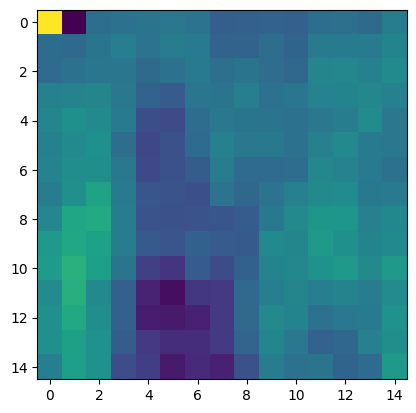

In [8]:
from time import sleep
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
from noise import PerlinNoise, quadratic_mask

size = (15, 15)

perlin = PerlinNoise(shape=size, repetition_period=200)
test_mask = quadratic_mask(size, 0.6, 1.2)


for shift in range(50):
    noise = perlin.render(octaves=4, pixel_offset=(0, shift), relative_factor=2)
    image = (noise * test_mask).T
    image[0, 0] = 1
    image[0, 1] = 0
    plt.imshow(image)
    plt.show()  # show the plot
    sleep(0.05)  # pause for a second
    clear_output(wait=True)  # clear the output for the next loop
# print(p)

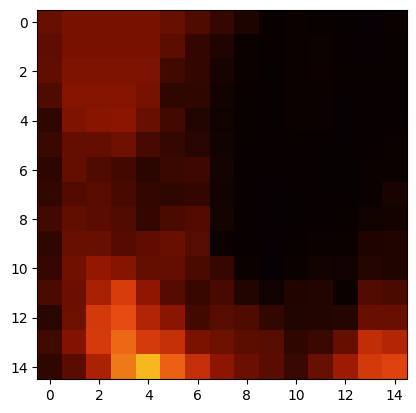

In [9]:
from utils import ColorMap, hex_to_rgb

# https://coolors.co/260c02-482d45-542c0b-a95404-d46d2a-f6a362-fdf37d
HEX_PALETTE = ["260c02", "482d45", "542c0b", "a95404", "d46d2a", "f6a362", "fdf37d"]
rgb_palette = [hex_to_rgb(color) for color in HEX_PALETTE]

colormap = ColorMap(rgb_palette)

for shift in range(200):
    noise = perlin.render(octaves=4, pixel_offset=(0, shift), relative_factor=2)
    image = (noise * test_mask).T
    plt.imshow(colormap(image))
    plt.show()  # show the plot
    sleep(0.05)  # pause for a second
    clear_output(wait=True)  # clear the output for the next loop

(8, 8)


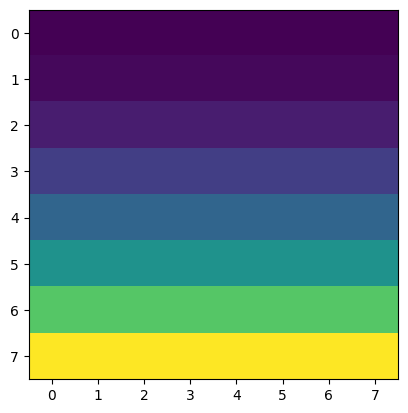

In [6]:
test_mask = quadratic_mask((8, 8), 0, 1)
print(test_mask.shape)
plt.imshow(test_mask.T)